In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test theo tỉ lệ 8:2**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [4]:
# 4. Chia train, test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]   # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
# 8. Define LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 16s 443ms/step - loss: 0.0318 - val_loss: 0.0032
Epoch 2/100
23/23 [==============================] - 9s 402ms/step - loss: 0.0032 - val_loss: 0.0046
Epoch 3/100
23/23 [==============================] - 6s 279ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 4/100
23/23 [==============================] - 7s 308ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 5/100
23/23 [==============================] - 5s 222ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 6/100
23/23 [==============================] - 5s 210ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 7/100
23/23 [==============================] - 7s 299ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 8/100
23/23 [==============================] - 6s 252ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/100
23/23 [==============================] - 9s 399ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/100
23/23 [==============================] - 5s 221ms/step - loss: 0.0015 - val_l

In [10]:
# 10. Dự báo dữ liệu test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

9/9 [==============================] - 0s 37ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, ytest)
test_rmse = np.sqrt(np.mean((y_pred_test - ytest)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, ytest)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1514.7076098549105
Testing RMSE: 1861.6241815840995
Testing MAPE: 0.03396865893624538


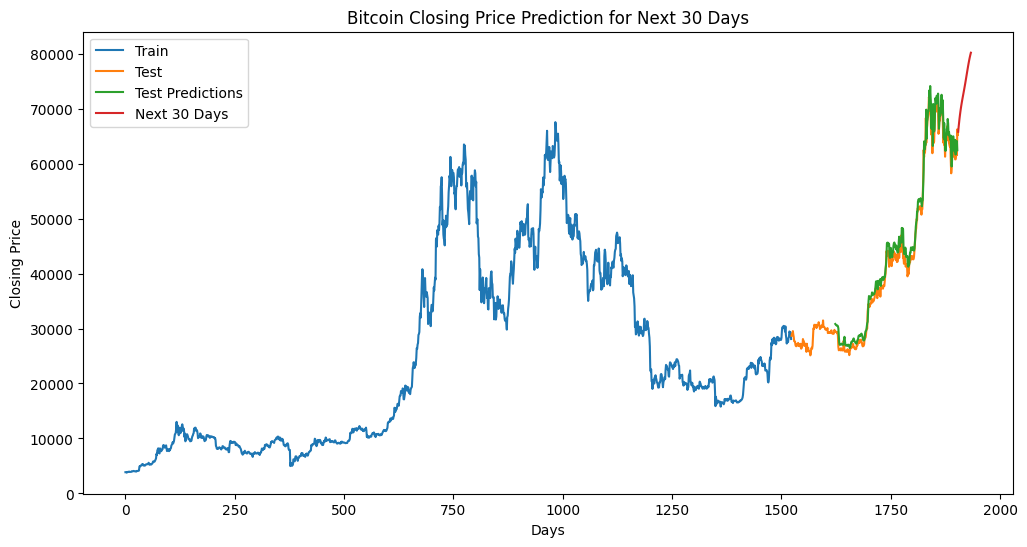

Predicted closing prices for the next 30 days:
[65811.03  66692.99  67451.14  68201.59  68856.54  69464.05  70025.78
 70547.766 71036.11  71498.34  71942.21  72375.33  72804.695 73236.266
 73674.65  74122.836 74582.15  75052.24  75531.18  76015.79  76501.9
 76984.695 77459.14  77920.31  78363.63  78785.14  79181.586 79550.49
 79890.41  80200.6  ]


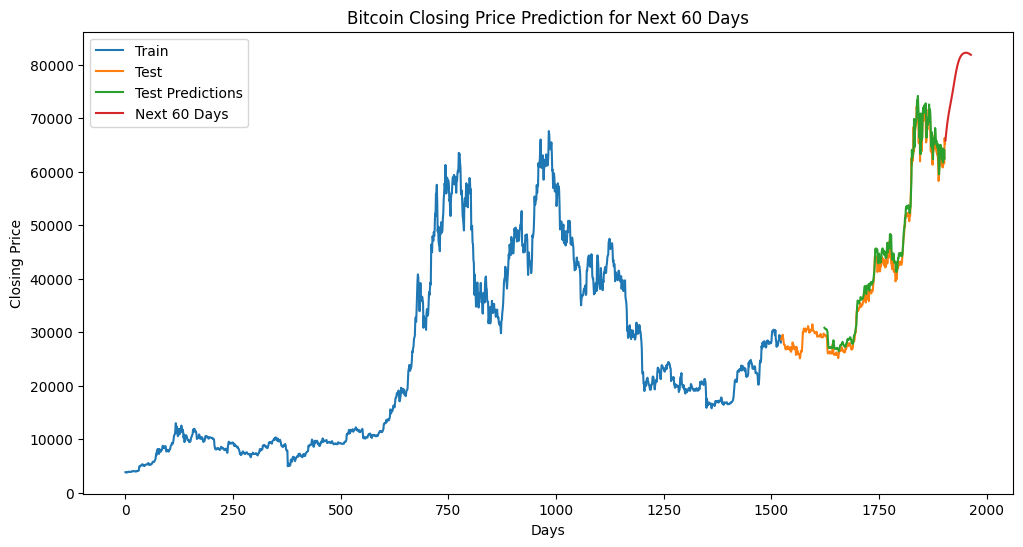

Predicted closing prices for the next 60 days:
[65811.03  66692.99  67451.14  68201.59  68856.54  69464.05  70025.78
 70547.766 71036.11  71498.34  71942.21  72375.33  72804.695 73236.266
 73674.65  74122.836 74582.15  75052.24  75531.18  76015.79  76501.9
 76984.695 77459.14  77920.31  78363.63  78785.14  79181.586 79550.49
 79890.41  80200.6   80481.125 80732.72  80956.58  81154.35  81327.98
 81479.516 81611.1   81724.836 81822.67  81906.37  81977.42  82037.11
 82086.56  82126.52  82157.68  82180.555 82195.5   82202.75  82202.58
 82195.19  82180.875 82159.93  82132.67  82099.51  82060.89  82017.33
 81969.37  81917.555 81862.42  81804.555]


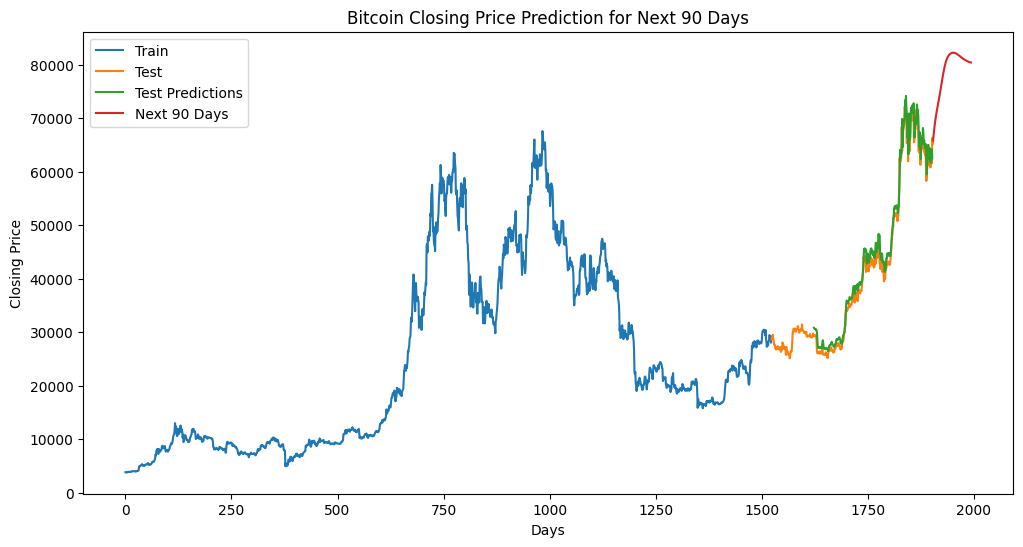

Predicted closing prices for the next 90 days:
[65811.03  66692.99  67451.14  68201.59  68856.54  69464.05  70025.78
 70547.766 71036.11  71498.34  71942.21  72375.33  72804.695 73236.266
 73674.65  74122.836 74582.15  75052.24  75531.18  76015.79  76501.9
 76984.695 77459.14  77920.31  78363.63  78785.14  79181.586 79550.49
 79890.41  80200.6   80481.125 80732.72  80956.58  81154.35  81327.98
 81479.516 81611.1   81724.836 81822.67  81906.37  81977.42  82037.11
 82086.56  82126.52  82157.68  82180.555 82195.5   82202.75  82202.58
 82195.19  82180.875 82159.93  82132.67  82099.51  82060.89  82017.33
 81969.37  81917.555 81862.42  81804.555 81744.53  81682.85  81620.05
 81556.69  81493.19  81429.97  81367.49  81306.01  81245.71  81186.8
 81129.43  81073.68  81019.555 80967.11  80916.35  80867.32  80820.02
 80774.45  80730.71  80688.82  80648.77  80610.61  80574.32  80539.94
 80507.484 80476.96  80448.3   80421.4   80396.26  80372.84 ]


In [13]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 7:3**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [15]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [16]:
# 4. Chia train, test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [17]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]   # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
# 8. Define LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 12s 263ms/step - loss: 0.0257 - val_loss: 0.0047
Epoch 2/100
20/20 [==============================] - 4s 186ms/step - loss: 0.0051 - val_loss: 0.0018
Epoch 3/100
20/20 [==============================] - 5s 249ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 4/100
20/20 [==============================] - 4s 204ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 5/100
20/20 [==============================] - 4s 211ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 6/100
20/20 [==============================] - 6s 305ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 7/100
20/20 [==============================] - 5s 258ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 8/100
20/20 [==============================] - 4s 185ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 9/100
20/20 [==============================] - 4s 183ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 10/100
20/20 [==============================] - 5s 276ms/step - loss: 0.0018 - val_l

In [22]:
# 10. Dự báo dữ liệu test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

15/15 [==============================] - 1s 62ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [24]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, ytest)
test_rmse = np.sqrt(np.mean((y_pred_test - ytest)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, ytest)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1213.7903020766983
Testing RMSE: 1507.7706511438075
Testing MAPE: 0.03283439631135775


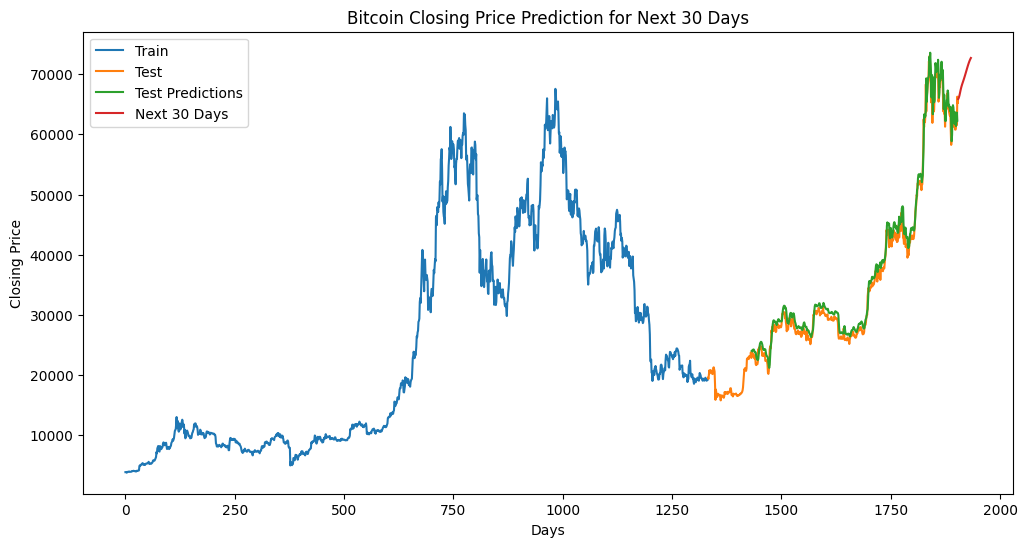

Predicted closing prices for the next 30 days:
[65869.52  66014.45  66231.3   66515.01  66848.11  67193.36  67520.65
 67815.305 68076.81  68313.07  68534.68  68751.05  68968.734 69191.46
 69420.72  69656.63  69898.48  70145.01  70394.6   70645.27  70894.69
 71140.34  71379.63  71609.984 71829.08  72034.87  72225.67  72400.28
 72557.86  72697.984]


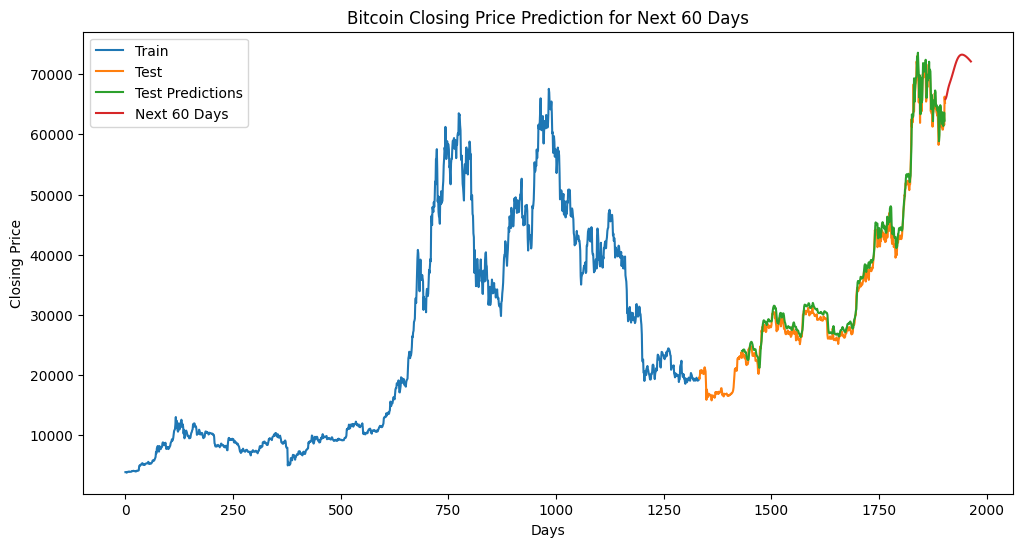

Predicted closing prices for the next 60 days:
[65869.52  66014.45  66231.3   66515.01  66848.11  67193.36  67520.65
 67815.305 68076.81  68313.07  68534.68  68751.05  68968.734 69191.46
 69420.72  69656.63  69898.48  70145.01  70394.6   70645.27  70894.69
 71140.34  71379.63  71609.984 71829.08  72034.87  72225.67  72400.28
 72557.86  72697.984 72820.664 72926.13  73014.97  73087.92  73145.95
 73190.055 73221.31  73240.78  73249.49  73248.45  73238.6   73220.76
 73195.664 73164.01  73126.36  73083.26  73035.13  72982.43  72925.5
 72864.72  72800.42  72732.92  72662.54  72589.64  72514.516 72437.46
 72358.83  72278.95  72198.15  72116.74 ]


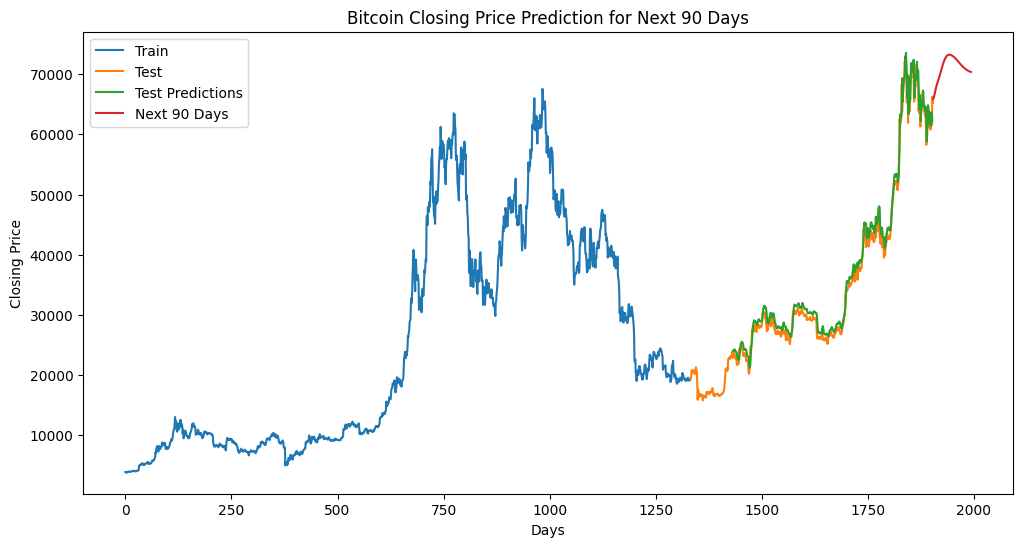

Predicted closing prices for the next 90 days:
[65869.52  66014.45  66231.3   66515.01  66848.11  67193.36  67520.65
 67815.305 68076.81  68313.07  68534.68  68751.05  68968.734 69191.46
 69420.72  69656.63  69898.48  70145.01  70394.6   70645.27  70894.69
 71140.34  71379.63  71609.984 71829.08  72034.87  72225.67  72400.28
 72557.86  72697.984 72820.664 72926.13  73014.97  73087.92  73145.95
 73190.055 73221.31  73240.78  73249.49  73248.45  73238.6   73220.76
 73195.664 73164.01  73126.36  73083.26  73035.13  72982.43  72925.5
 72864.72  72800.42  72732.92  72662.54  72589.64  72514.516 72437.46
 72358.83  72278.95  72198.15  72116.74  72035.03  71953.336 71871.93
 71791.086 71711.07  71632.125 71554.48  71478.31  71403.83  71331.164
 71260.48  71191.89  71125.5   71061.43  70999.734 70940.49  70883.74
 70829.52  70777.85  70728.79  70682.336 70638.45  70597.17  70558.484
 70522.38  70488.83  70457.8   70429.28  70403.234 70379.586]


In [25]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 6:4**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BTC.csv')
df1=df.reset_index()['Close']

In [27]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [28]:
# 4. Chia train, test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [29]:
# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]   # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [32]:
# 8. Define LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
17/17 [==============================] - 11s 285ms/step - loss: 0.0434 - val_loss: 0.0100
Epoch 2/100
17/17 [==============================] - 3s 202ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 3/100
17/17 [==============================] - 4s 220ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 4/100
17/17 [==============================] - 4s 261ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 5/100
17/17 [==============================] - 3s 200ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 6/100
17/17 [==============================] - 3s 199ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 7/100
17/17 [==============================] - 5s 283ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 8/100
17/17 [==============================] - 3s 198ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 9/100
17/17 [==============================] - 3s 199ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 10/100
17/17 [==============================] - 3s 201ms/step - loss: 0.0021 - val_l

In [34]:
# 10. Dự báo dữ liệu test
train_predict = model.predict(X_train)
y_pred_test = model.predict(X_test)

21/21 [==============================] - 1s 40ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, ytest)
test_rmse = np.sqrt(np.mean((y_pred_test - ytest)**2))
test_mape = mean_absolute_percentage_error(y_pred_test, ytest)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1233.2506526862705
Testing RMSE: 1504.8536416475183
Testing MAPE: 0.04070221756287446


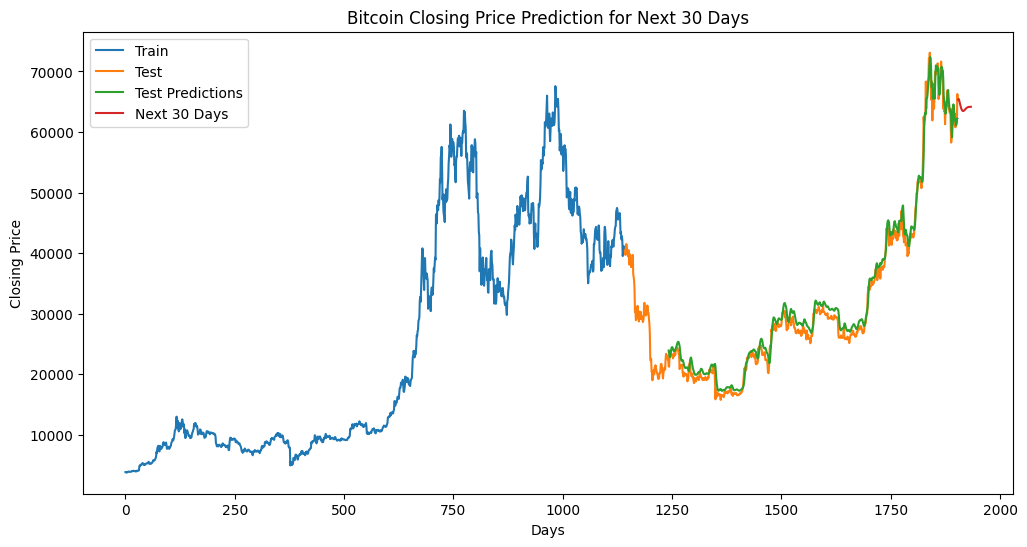

Predicted closing prices for the next 30 days:
[65311.83  65455.5   65271.367 64995.72  64694.523 64395.863 64121.016
 63886.242 63701.637 63571.14  63493.484 63463.535 63473.66  63514.863
 63577.88  63653.93  63735.305 63815.684 63890.35  63956.113 64011.254
 64055.316 64088.78  64112.85  64129.195 64139.652 64146.1   64150.22
 64153.48  64157.047]


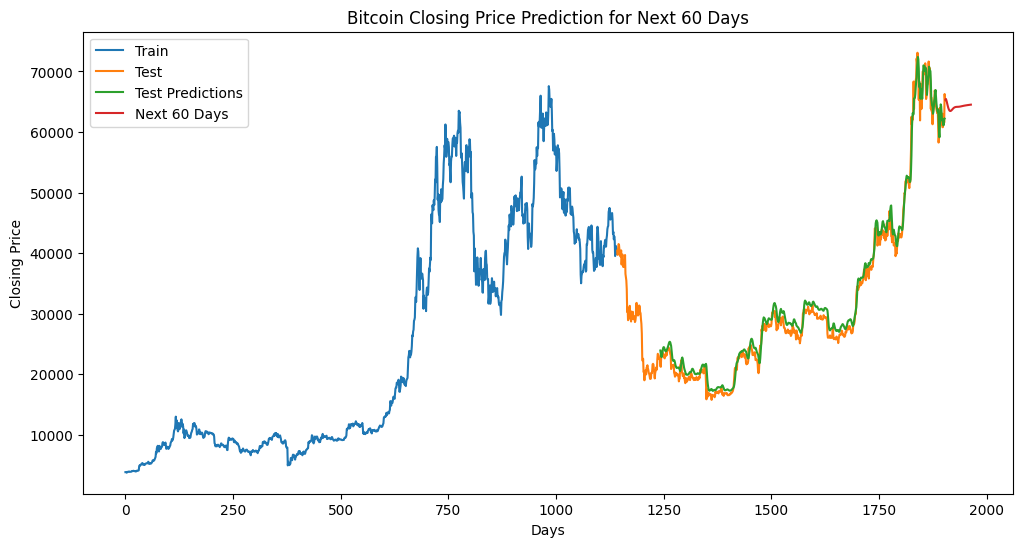

Predicted closing prices for the next 60 days:
[65311.83  65455.5   65271.367 64995.72  64694.523 64395.863 64121.016
 63886.242 63701.637 63571.14  63493.484 63463.535 63473.66  63514.863
 63577.88  63653.93  63735.305 63815.684 63890.35  63956.113 64011.254
 64055.316 64088.78  64112.85  64129.195 64139.652 64146.1   64150.22
 64153.48  64157.047 64161.742 64168.105 64176.406 64186.625 64198.66
 64212.2   64226.934 64242.477 64258.47  64274.58  64290.535 64306.137
 64321.22  64335.72  64349.605 64362.87  64375.54  64387.72  64399.43
 64410.785 64421.824 64432.617 64443.203 64453.59  64463.84  64473.945
 64483.895 64493.695 64503.336 64512.816]


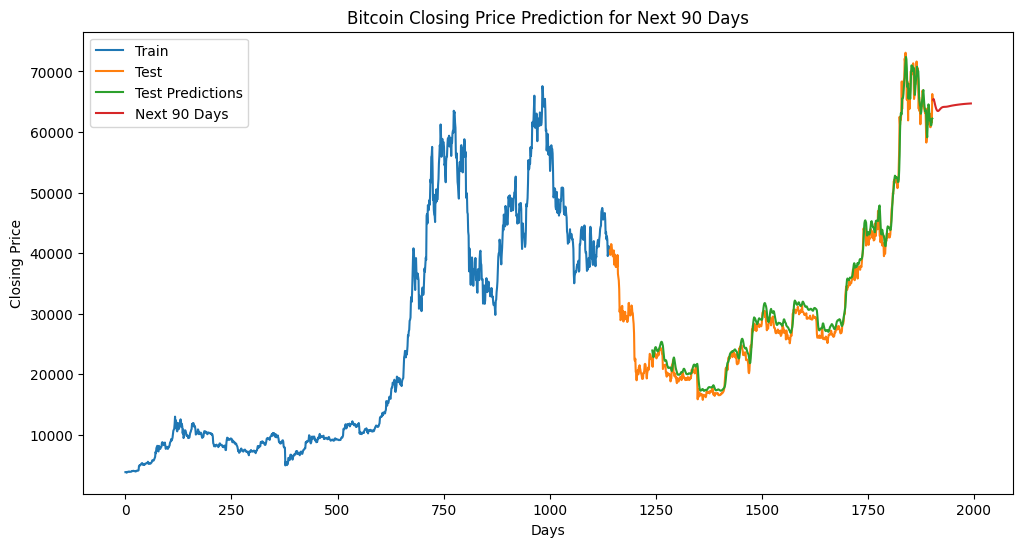

Predicted closing prices for the next 90 days:
[65311.83  65455.5   65271.367 64995.72  64694.523 64395.863 64121.016
 63886.242 63701.637 63571.14  63493.484 63463.535 63473.66  63514.863
 63577.88  63653.93  63735.305 63815.684 63890.35  63956.113 64011.254
 64055.316 64088.78  64112.85  64129.195 64139.652 64146.1   64150.22
 64153.48  64157.047 64161.742 64168.105 64176.406 64186.625 64198.66
 64212.2   64226.934 64242.477 64258.47  64274.58  64290.535 64306.137
 64321.22  64335.72  64349.605 64362.87  64375.54  64387.72  64399.43
 64410.785 64421.824 64432.617 64443.203 64453.59  64463.84  64473.945
 64483.895 64493.695 64503.336 64512.816 64522.156 64531.297 64540.26
 64549.04  64557.598 64565.957 64574.098 64581.97  64589.645 64597.082
 64604.305 64611.293 64618.09  64624.69  64631.13  64637.355 64643.457
 64649.375 64655.117 64660.7   64666.12  64671.367 64676.44  64681.375
 64686.11  64690.688 64695.1   64699.4   64703.547 64707.547]


In [37]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred_test)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())